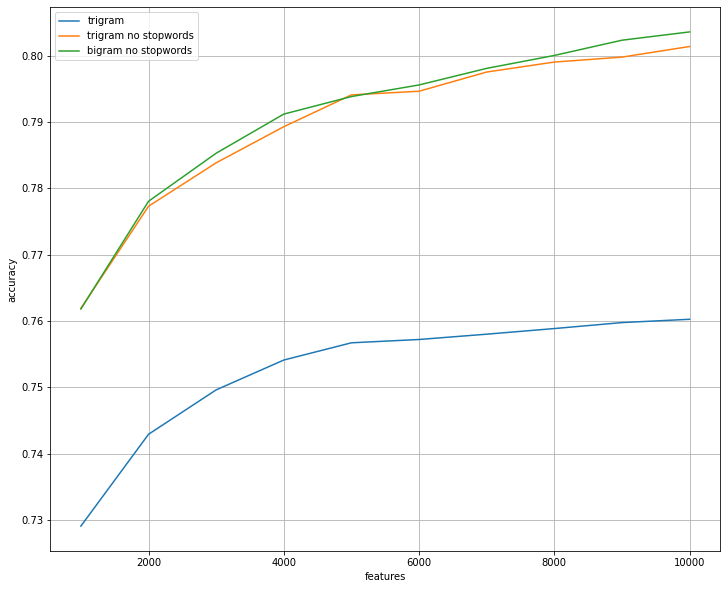

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def split(data):
    x_train,x_test,y_train,y_test=train_test_split(data.text,data.sentiment, test_size=0.1, shuffle=True, random_state=42)
    return x_train,x_test,y_train,y_test

df=pd.read_csv('s140-cleaned.csv')
df['text'].fillna(' ',inplace=True)
x_train,x_test,y_train,y_test=split(df)

tfvec = TfidfVectorizer()
lr = LogisticRegression(solver='saga')
n_features = np.arange(1000,11000,1000)

def n_feature_acc(vectorizer=tfvec,nfeatures=n_features,stop_words=ENGLISH_STOP_WORDS,ngram=(1,2),classifier=lr):
    for n in nfeatures:
        vectorizer.set_params(stop_words=stop_words,max_features=n,ngram_range=ngram)
        spipe=Pipeline([('vectorizer',vectorizer),('classifier',classifier)])
        spipe.fit(x_train,y_train)
        y_pred=spipe.predict(x_test)
        acc=accuracy_score(y_pred,y_test)
        yield acc

res_tri=n_feature_acc(ngram=(1,3))
res_no_stop=n_feature_acc(stop_words=None, ngram=(1,3))
res_no_stop_bi=n_feature_acc(stop_words=None, ngram=(1,2))
plt.figure(figsize=(12,10))
plt.plot(n_features,[acc for acc in res_tri], label='trigram')
plt.plot(n_features,[acc for acc in res_no_stop], label='trigram no stopwords')
plt.plot(n_features,[acc for acc in res_no_stop_bi], label='bigram no stopwords')
plt.xlabel('features')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [2]:
#now that we have seen the best performing model is bigrams without stopwords it's time to pickle it

import joblib

features=2000
tfvec.set_params(stop_words=None,max_features=features,ngram_range=(1,2))
final_model=Pipeline([('vectorizer',tfvec),('classifier',lr)])
final_model.fit(x_train,y_train)
joblib.dump(final_model,'final_classifier.pickle')

['final_classifier.pickle']